In [63]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float
import scipy

(300, 451)


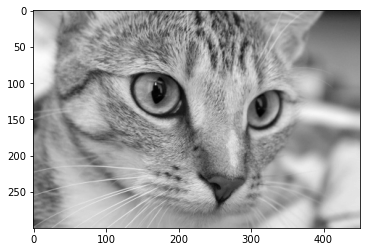

In [64]:
cat_image= rgb2gray(img_as_float(data.chelsea()))
plt.imshow(cat_image, cmap ='gray')
original_shape=cat_image.shape
print(original_shape)

In [65]:
#%timeit u,s,vt = svd(cat_image)

In [66]:
#%timeit u,s,vt= scipy.linalg.svd(cat_image)

In [67]:
def svd_transform(image,k):
    U,s,Vt = svd(image, full_matrices= False)
    reconstruct_matrix=np.dot(U[:,:k],np.dot(np.diag(s[:k]),Vt[:k,:]))
    return reconstruct_matrix,s


(300, 451)
(300, 451)


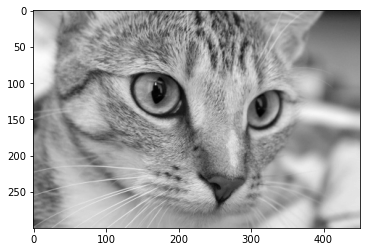

In [68]:
k=300
img,s= svd_transform(cat_image,k)
plt.imshow(img, cmap='gray')
print(img.shape)
print(cat_image.shape)


First ten values [170.4  21.6  17.4  12.4  11.5  10.2   9.1   7.4   6.9   6.6]


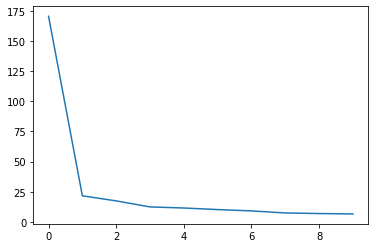

In [69]:
sp= np.round(s[:10],1)
print("First ten values",sp)
plt.plot(sp)

Size of the original Image 135300
Size of compressed image 225600


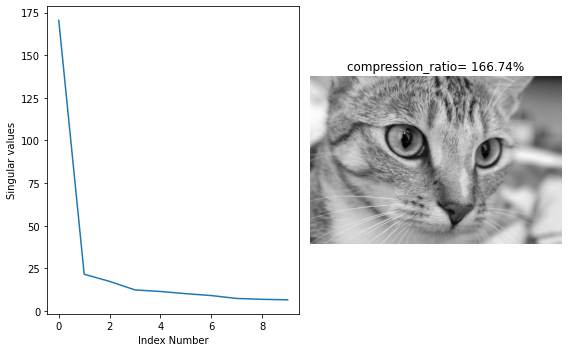

In [70]:
fig,ax =plt.subplots(1,2, figsize=(8,5))
ax[0].plot(sp)
ax[0].set_xlabel("Index Number")
ax[0].set_ylabel("Singular values")
print("Size of the original Image",original_shape[0]*original_shape[1])
print("Size of compressed image", k*(original_shape[0]+original_shape[1]+1))
compression_ratio=k*(original_shape[0]+original_shape[1]+1)/(original_shape[0]*original_shape[1])*100
ax[1].set_title("compression_ratio= {:.2f}".format(compression_ratio)+"%")
ax[1].imshow(img, cmap='gray')
ax[1].axis('Off')
fig.tight_layout()

[[4 5 6]
 [9 8 7]
 [5 2 3]]


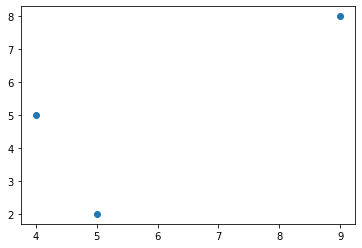

In [110]:
#define a matrix
A=np.array([[4,5,6],[9,8,7],[5,2,3]])
#A=np.transpose(A)
u ,s ,Vt= svd(A)
print(A)
plt.scatter(A[:,0],A[:,1])

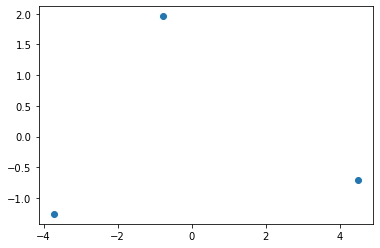

In [114]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
proj2=pca.fit_transform(A)
plt.scatter(proj2[:,0],proj2[:,1])

In [102]:
#help(np.linalg)
arr= np.array([[3,2,2],[2,3,2],[2,2,3]])
eg= np.linalg.eigvals(arr)
print(eg)
egval,egvec= np.linalg.eig(arr)
print(egval,"\n\n",egvec)
#print(np.cov(arr))

[1. 7. 1.]
[1. 7. 1.] 

 [[-0.81649658  0.57735027 -0.27546855]
 [ 0.40824829  0.57735027 -0.52791413]
 [ 0.40824829  0.57735027  0.80338269]]
[[ 0.33333333 -0.16666667 -0.16666667]
 [-0.16666667  0.33333333 -0.16666667]
 [-0.16666667 -0.16666667  0.33333333]]


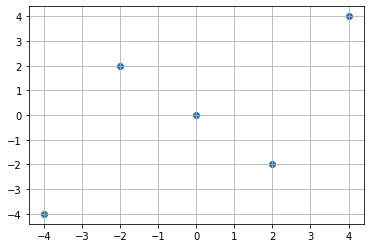

In [94]:
#pca using numpy and plotting 2 dimentional array
d2= np.array([[-2,2],[-4,-4],[4,4],[2,-2],[0,0]])
plt.scatter(d2[:,0],d2[:,1])
plt.grid()

In [99]:
#finding eigen values and eigen vector for above matrices
covar=np.cov(d2[:,0], d2[:,1])
print(covar,"\n",covar.shape)
eigvals, eigvecs =np.linalg.eig(covar)
print(eigvals,"\n\n",eigvecs)

[[10.  6.]
 [ 6. 10.]] 
 (2, 2)
[16.  4.] 

 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


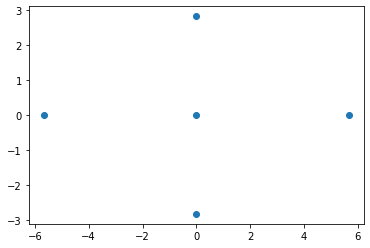

In [105]:
proj_x= np.matmul(d2,eigvecs)
plt.scatter(proj_x[:,0], proj_x[:,1])

In [72]:
print(u,"\n\n",s,"\n\n",Vt)

[[-0.62651298  0.77764109  0.05249599]
 [-0.55020734 -0.3935628  -0.73646467]
 [-0.55204472 -0.49028835  0.67443603]] 

 [17.3624054   2.46350574  1.21573767] 

 [[-0.49355816 -0.8008446  -0.33918766]
 [-0.7302519   0.16977794  0.66174588]
 [ 0.47236903 -0.57430252  0.66861358]]


In [73]:
print(u,"\n\n",s,"\n\n",Vt)

[[-0.62651298  0.77764109  0.05249599]
 [-0.55020734 -0.3935628  -0.73646467]
 [-0.55204472 -0.49028835  0.67443603]] 

 [17.3624054   2.46350574  1.21573767] 

 [[-0.49355816 -0.8008446  -0.33918766]
 [-0.7302519   0.16977794  0.66174588]
 [ 0.47236903 -0.57430252  0.66861358]]
